Question:
Q1. What time of the year does most sales occur?
Q2. Which neighborhood is the sought after by buyers?
Q3. Which type of biulding class category gives the most sales?
Q4. What neighborhoods are considered to be the most expensive?
Q5. Does year build have an effect on property sale price?

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot
%matplotlib inline
from scipy import stats

In [2]:
#Importing the data; reading CSV file and creating 'salesdf' dataframe
salesdf = pd.read_csv("nyc-rolling-sales-dirty.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Get an idea how the data is
salesdf.head(30)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392.0,No Number,,65000,NaN,...,5,0,5,1633,6440,1900,2,C2,6625000,why
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,26,,C7,NaN,...,28,3,31,4616,18690,1900,2,C7,-,12/14/2016 0:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,399.0,39,,C7,NaN,...,16,1,17,2212,7803,1900,2,C7,-,12/09/2016 0:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,402.0,21,,C4,NaN,...,10,0,10,2272,6794,1913,2,C4,3936272,9/23/2016 0:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,404.0,55,,C2,NaN,...,6,0,6,2369,4615,1900,2,C2,8000000,11/17/2016 0:00
5,9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,405.0,16,,C4,NaN,...,20,0,20,2581,9730,1900,2,C4,-,later
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,406.0,32,,C4,NaN,...,8,0,8,1750,4226,1920,2,C4,3192840,9/23/2016 0:00
7,11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,407.0,18,,C7,NaN,...,44,2,46,5163,21007,1900,2,C7,-,7/20/2017 0:00
8,12,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,NaN,379.0,34,,D5,NaN,...,15,0,15,1534,9198,1920,2,D5,-,6/20/2017 0:00
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387.0,153,,D9,NaN,...,24,0,24,4489,18523,1920,2,D9,16232000,11/07/2016 0:00


In [4]:
#printing out the basic info(shape: number of rows and columns, dtypes: datatypes of each column)
print(salesdf.shape)
print(salesdf.dtypes)

(84548, 22)
Unnamed: 0                          int64
BOROUGH                             int64
NEIGHBORHOOD                       object
BUILDING CLASS CATEGORY            object
TAX CLASS AT PRESENT               object
BLOCK                             float64
LOT                                object
EASE-MENT                          object
BUILDING CLASS AT PRESENT          object
ADDRESS                            object
APARTMENT NUMBER                   object
ZIP CODE                          float64
RESIDENTIAL UNITS                   int64
COMMERCIAL UNITS                    int64
TOTAL UNITS                         int64
LAND SQUARE FEET                   object
GROSS SQUARE FEET                  object
YEAR BUILT                          int64
TAX CLASS AT TIME OF SALE           int64
BUILDING CLASS AT TIME OF SALE     object
SALE PRICE                         object
SALE DATE                          object
dtype: object


In [5]:
#The column 'SALE DATE' has some incorrect values as well we need to convert it to datetime

# Lets see how many rows will be affected if we replace incorrect values with NaT
affected_date_records = pd.to_datetime(salesdf['SALE DATE'], errors='coerce').isnull().sum() - salesdf['SALE DATE'].isnull().sum()
print("Affected Sale date records=%d" % affected_date_records)

affected_qty_records = pd.to_numeric(salesdf['LOT'], errors='coerce').isnull().sum() - salesdf['LOT'].isnull().sum()
print("Affected Lot records=%d" % affected_qty_records)

Affected Sale date records=3
Affected Lot records=10


In [6]:
# Very few rows are being affected, so safe to replace
salesdf['SALE DATE'] = pd.to_datetime(salesdf['SALE DATE'], errors='coerce') # Replace incorrect values with NaT
salesdf['LOT'] = pd.to_numeric(salesdf['LOT'], downcast='integer', errors='coerce')

In [7]:
#Also replacing other columns which have incorrect '-' values
salesdf['SALE PRICE'] = pd.to_numeric(salesdf['SALE PRICE'], downcast='integer', errors='coerce')
salesdf['GROSS SQUARE FEET'] = pd.to_numeric(salesdf['GROSS SQUARE FEET'], downcast='integer', errors='coerce')
salesdf['LAND SQUARE FEET'] = pd.to_numeric(salesdf['LAND SQUARE FEET'], downcast='integer', errors='coerce')

In [8]:
salesdf.isnull().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                         30
BUILDING CLASS CATEGORY              51
TAX CLASS AT PRESENT                  7
BLOCK                                16
LOT                                  10
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                              45
APARTMENT NUMBER                      1
ZIP CODE                             36
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             3
dtype: int64

In [9]:
#Dropping irrelevent columns that I won't be using 
salesdf = salesdf.drop(['Unnamed: 0', 'BLOCK', 'EASE-MENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE', 'LAND SQUARE FEET', 'GROSS SQUARE FEET'], axis=1)

In [10]:
#Printing modes of the columns with null values 
print(salesdf['NEIGHBORHOOD'].mode())
print(salesdf['BUILDING CLASS CATEGORY'].mode())

0    FLUSHING-NORTH
dtype: object
0    01 ONE FAMILY DWELLINGS                    
dtype: object


In [11]:
#replacing null values with mode of the column
salesdf['NEIGHBORHOOD'].fillna('FLUSHING-NORTH', inplace=True)
salesdf['BUILDING CLASS CATEGORY'].fillna('01 ONE FAMILY DWELLINGS', inplace=True)

In [12]:
salesdf.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  7
LOT                                  10
BUILDING CLASS AT PRESENT             0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             3
dtype: int64

In [13]:
#Removing rows with null values
salesdf = salesdf.drop(salesdf[(salesdf['TAX CLASS AT PRESENT'].isnull())].index)
salesdf = salesdf.drop(salesdf[(salesdf['LOT'].isnull())].index)
salesdf = salesdf.drop(salesdf[(salesdf['SALE DATE'].isnull())].index)

In [14]:
#Also dropping null values rows in the SALE PRICE column since replacing it with the mean could have impact on our analysis
salesdf = salesdf.drop(salesdf[(salesdf['SALE PRICE'].isnull())].index)

In [15]:
#Changing for better visualization
salesdf['BOROUGH'] = salesdf['BOROUGH'].astype(str)
salesdf['BOROUGH'] = salesdf['BOROUGH'].str.replace("1", "Manhattan")
salesdf['BOROUGH'] = salesdf['BOROUGH'].str.replace("2", "Bronx")
salesdf['BOROUGH'] = salesdf['BOROUGH'].str.replace("3", "Brooklyn")
salesdf['BOROUGH'] = salesdf['BOROUGH'].str.replace("4", "Queens")
salesdf['BOROUGH'] = salesdf['BOROUGH'].str.replace("5", "Staten Island")

In [16]:
salesdf.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
LOT                               0
BUILDING CLASS AT PRESENT         0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

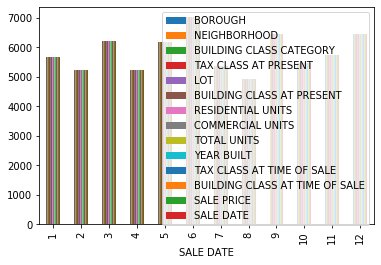

In [17]:
# For Highest Number sales
salesdf.groupby([salesdf["SALE DATE"].dt.month]).count().plot(kind="bar")

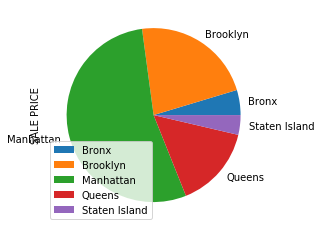

In [18]:
import matplotlib.pyplot as plt
salesdf.groupby(['BOROUGH']).sum().plot(kind='pie', y='SALE PRICE')

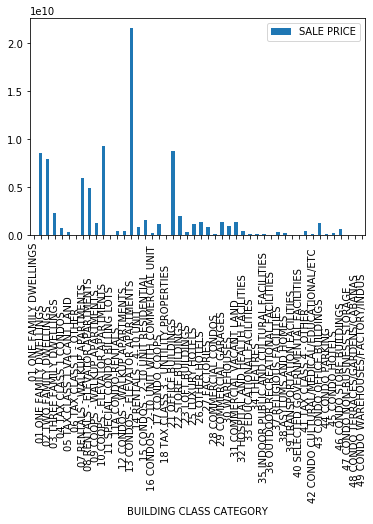

In [19]:
import matplotlib.pyplot as plt
salesdf.groupby(['BUILDING CLASS CATEGORY']).sum().plot(kind='bar', y='SALE PRICE')